In [5]:
# Import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import numpy
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224,224]
BATCH_SIZE = 32
EPOCHS = 25

train_path = "Datasets/Train/"
test_path = "Datasets/Test/"

In [7]:
def create_model(model_name, best_model_name):
    
    base_model = model_name(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
    
    # don't train existing weights
    for layer in base_model.layers:
        layer.trainable = False
        
    # for getting number of output classes
    folders = os.listdir(train_path)
    
    # our layers
    x = Flatten()(base_model.output)
    
    prediction = Dense(len(folders), activation="softmax")(x)
    
    model = Model(inputs=base_model.input, outputs=prediction)
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    
    
    train_datagen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)
    
    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = IMAGE_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = "categorical")
    
    test_set = test_datagen.flow_from_directory(test_path,
                                              target_size = IMAGE_SIZE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = "categorical")
    
    
    es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=50)
    
    mc = ModelCheckpoint(best_model_name, monitor='val_accuracy',mode='max',verbose=1)
    
    r = model.fit(train_set,
              validation_data = test_set,
              epochs = EPOCHS,
              steps_per_epoch = len(train_set),
              validation_steps = len(test_set),
              callbacks=[es, mc])
    
    return r, model, test_set

#### I've used four popular Transfer Learning Models - ResNet50, VGG16, InceptionV3 and Xception

#### ResNet50

In [4]:
r, model, test_set = create_model(ResNet50, 'best_resnet_model.h5')

Found 353 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/25
12/12 [==============================] - ETA: 0s - loss: 5.9972 - accuracy: 0.3229
Epoch 1: saving model to best_resnet_model.h5
12/12 [==============================] - 35s 3s/step - loss: 5.9972 - accuracy: 0.3229 - val_loss: 3.5613 - val_accuracy: 0.3365
Epoch 2/25
12/12 [==============================] - ETA: 0s - loss: 4.8862 - accuracy: 0.3428
Epoch 2: saving model to best_resnet_model.h5
12/12 [==============================] - 31s 3s/step - loss: 4.8862 - accuracy: 0.3428 - val_loss: 4.3581 - val_accuracy: 0.3810
Epoch 3/25
12/12 [==============================] - ETA: 0s - loss: 3.4759 - accuracy: 0.3683
Epoch 3: saving model to best_resnet_model.h5
12/12 [==============================] - 32s 3s/step - loss: 3.4759 - accuracy: 0.3683 - val_loss: 3.0086 - val_accuracy: 0.4000
Epoch 4/25
12/12 [==============================] - ETA: 0s - loss: 1.7626 - accuracy: 0.4419
Epoch 4: saving m

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [6]:
# ResNet50 model
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 14s - loss: 1.3600 - accuracy: 0.4571 - 14s/epoch - 1s/step
Restored model, accuracy: 45.71%


In [7]:
# ResNet50 model while checkpointing
model=load_model('best_resnet_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 14s - loss: 1.3600 - accuracy: 0.4571 - 14s/epoch - 1s/step
Restored model, accuracy: 45.71%


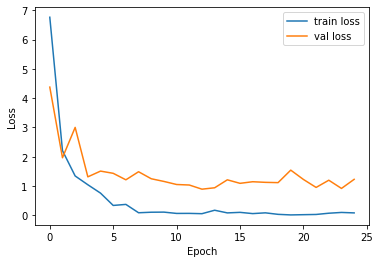

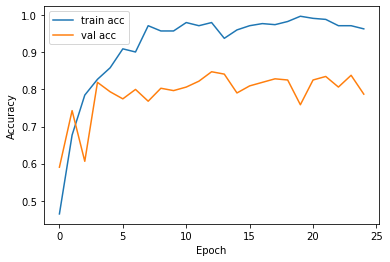

<Figure size 432x288 with 0 Axes>

In [24]:
## plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### VGG16

In [9]:
r, model, test_set = create_model(VGG16, 'best_vgg16_model.h5')

Found 353 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/25
12/12 [==============================] - ETA: 0s - loss: 1.7030 - accuracy: 0.4986
Epoch 1: saving model to best_vgg16_model.h5
12/12 [==============================] - 48s 4s/step - loss: 1.7030 - accuracy: 0.4986 - val_loss: 1.1555 - val_accuracy: 0.4667
Epoch 2/25
12/12 [==============================] - ETA: 0s - loss: 0.7689 - accuracy: 0.6742
Epoch 2: saving model to best_vgg16_model.h5
12/12 [==============================] - 47s 4s/step - loss: 0.7689 - accuracy: 0.6742 - val_loss: 0.7275 - val_accuracy: 0.6730
Epoch 3/25
12/12 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8272
Epoch 3: saving model to best_vgg16_model.h5
12/12 [==============================] - 47s 4s/step - loss: 0.4255 - accuracy: 0.8272 - val_loss: 0.5587 - val_accuracy: 0.7683
Epoch 4/25
12/12 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8754
Epoch 4: saving mode

In [10]:
# VGG16 Model
model.save('model_vgg16.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 22s - loss: 0.4162 - accuracy: 0.8508 - 22s/epoch - 2s/step
Restored model, accuracy: 85.08%


In [11]:
# VGG!6 model while checkpointing
model=load_model('best_vgg16_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 22s - loss: 0.4162 - accuracy: 0.8508 - 22s/epoch - 2s/step
Restored model, accuracy: 85.08%


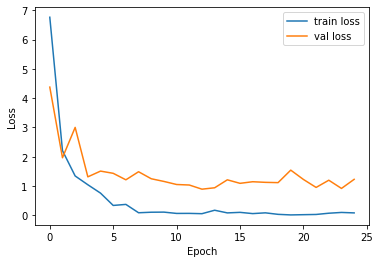

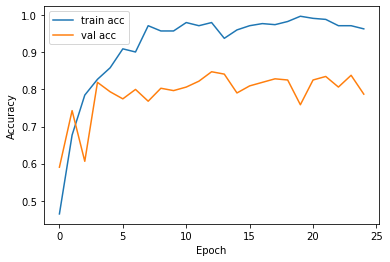

<Figure size 432x288 with 0 Axes>

In [25]:
## plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### InceptionV3

In [8]:
r, model, test_set = create_model(InceptionV3,'best_inception_model.h5')

Found 353 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/25
12/12 [==============================] - ETA: 0s - loss: 5.7955 - accuracy: 0.4533
Epoch 1: saving model to best_inception_model.h5
12/12 [==============================] - 23s 1s/step - loss: 5.7955 - accuracy: 0.4533 - val_loss: 3.1126 - val_accuracy: 0.6317
Epoch 2/25
12/12 [==============================] - ETA: 0s - loss: 2.9500 - accuracy: 0.6941
Epoch 2: saving model to best_inception_model.h5
12/12 [==============================] - 15s 1s/step - loss: 2.9500 - accuracy: 0.6941 - val_loss: 3.0720 - val_accuracy: 0.7016
Epoch 3/25
12/12 [==============================] - ETA: 0s - loss: 2.6111 - accuracy: 0.7564
Epoch 3: saving model to best_inception_model.h5
12/12 [==============================] - 15s 1s/step - loss: 2.6111 - accuracy: 0.7564 - val_loss: 3.6221 - val_accuracy: 0.6667
Epoch 4/25
12/12 [==============================] - ETA: 0s - loss: 0.9605 - accuracy: 0.8470
Epoch 4:

In [9]:
# Inception Model
model.save('model_inception.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 6s - loss: 1.2255 - accuracy: 0.8476 - 6s/epoch - 627ms/step
Restored model, accuracy: 84.76%


In [10]:
# Inception model while checkpointing
model=load_model('best_inception_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 7s - loss: 1.2255 - accuracy: 0.8476 - 7s/epoch - 728ms/step
Restored model, accuracy: 84.76%


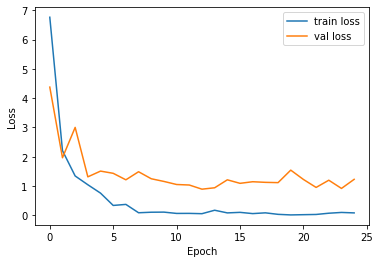

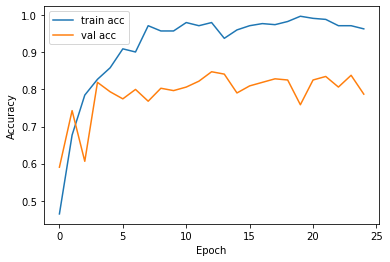

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Xception

In [12]:
r, model, test_set = create_model(Xception,'best_xception_model.h5')

Found 353 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/25
12/12 [==============================] - ETA: 0s - loss: 6.7645 - accuracy: 0.4646
Epoch 1: saving model to best_xception_model.h5
12/12 [==============================] - 30s 2s/step - loss: 6.7645 - accuracy: 0.4646 - val_loss: 4.3788 - val_accuracy: 0.5905
Epoch 2/25
12/12 [==============================] - ETA: 0s - loss: 2.2103 - accuracy: 0.6771
Epoch 2: saving model to best_xception_model.h5
12/12 [==============================] - 27s 2s/step - loss: 2.2103 - accuracy: 0.6771 - val_loss: 1.9666 - val_accuracy: 0.7429
Epoch 3/25
12/12 [==============================] - ETA: 0s - loss: 1.3450 - accuracy: 0.7847
Epoch 3: saving model to best_xception_model.h5
12/12 [==============================] - 26s 2s/step - loss: 1.3450 - accuracy: 0.7847 - val_loss: 3.0034 - val_accuracy: 0.6063
Epoch 4/25
12/12 [==============================] - ETA: 0s - loss: 1.0449 - accuracy: 0.8272
Epoch 4: sa

In [13]:
# Xception Model
model.save('model_xception.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 12s - loss: 1.2298 - accuracy: 0.7873 - 12s/epoch - 1s/step
Restored model, accuracy: 78.73%


In [14]:
# Xception model while checkpointing
model=load_model('best_xception_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

10/10 - 12s - loss: 1.2298 - accuracy: 0.7873 - 12s/epoch - 1s/step
Restored model, accuracy: 78.73%


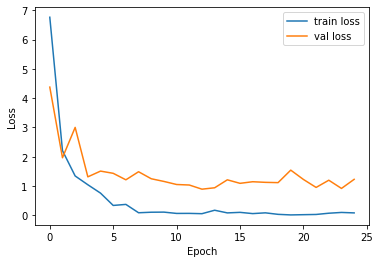

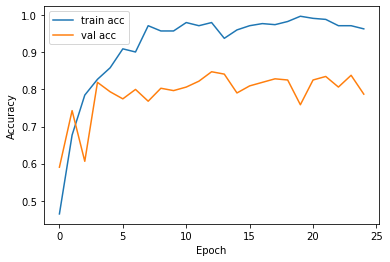

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred = model.predict(test_set)
y_pred

10/10 [==============================] - 18s 2s/step


array([[5.00967979e-01, 5.24575652e-23, 4.99032021e-01],
       [9.91518080e-01, 2.92162458e-15, 8.48188996e-03],
       [2.61059403e-02, 2.42835350e-14, 9.73894060e-01],
       [6.07951847e-07, 6.77512435e-06, 9.99992609e-01],
       [9.99318719e-01, 9.37539299e-14, 6.81235339e-04],
       [3.88248873e-06, 9.99986410e-01, 9.67282176e-06],
       [1.79881267e-02, 4.65527992e-05, 9.81965363e-01],
       [8.13951992e-05, 2.43750158e-17, 9.99918580e-01],
       [7.29290918e-02, 8.83902133e-01, 4.31687720e-02],
       [4.51569235e-08, 1.79958758e-25, 1.00000000e+00],
       [3.65223896e-05, 9.99793589e-01, 1.69906372e-04],
       [4.71432358e-02, 4.66417760e-01, 4.86439019e-01],
       [4.57032293e-04, 5.71149867e-04, 9.98971820e-01],
       [2.81386346e-01, 4.63071346e-01, 2.55542248e-01],
       [5.88322549e-17, 1.00000000e+00, 8.97519420e-17],
       [7.58345379e-03, 7.99423244e-18, 9.92416501e-01],
       [4.16053355e-01, 1.62843974e-11, 5.83946586e-01],
       [9.98550594e-01, 4.96620

In [17]:
y_pred = numpy.argmax(y_pred,axis=1)
y_pred

array([0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2,